# Regression with a Flood Prediction Dataset

Amacımız: Bu projenin amacı çeşitli faktörlere dayanarak bir bölgenin sular altında kalma olasılığını tahmin etmektir.

<img src="https://cdn1.ntv.com.tr/gorsel/HIRO0fSswUuKJQHpFefRVA.jpg?width=1000&mode=crop&scale=both">

<a href="https://www.kaggle.com/competitions/playground-series-s4e5/data">Dataya Buradan Erişebilirsiniz</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",100)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


In [4]:
df.shape

(1117957, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [6]:
df.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

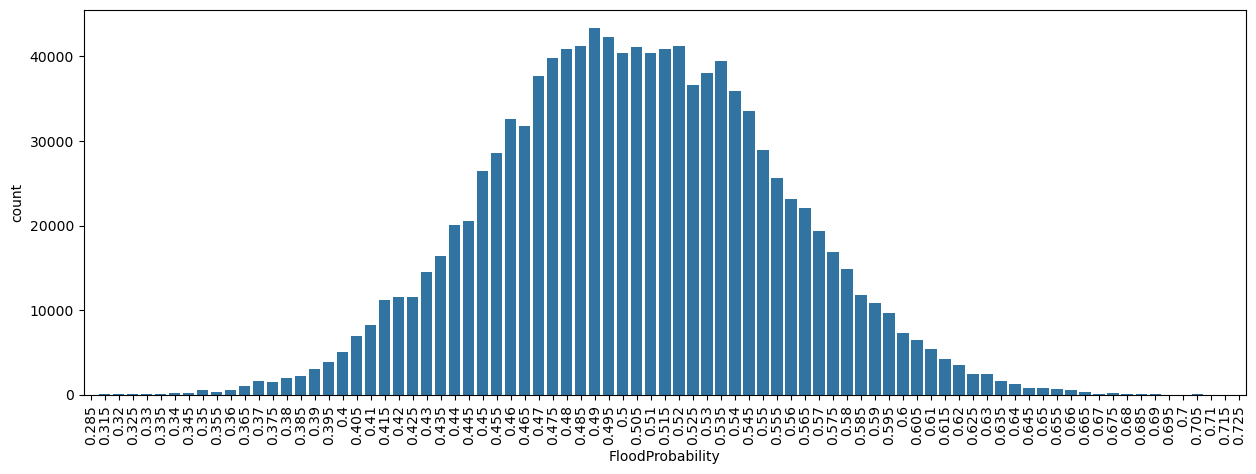

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["FloodProbability"])
plt.xticks(rotation=90);

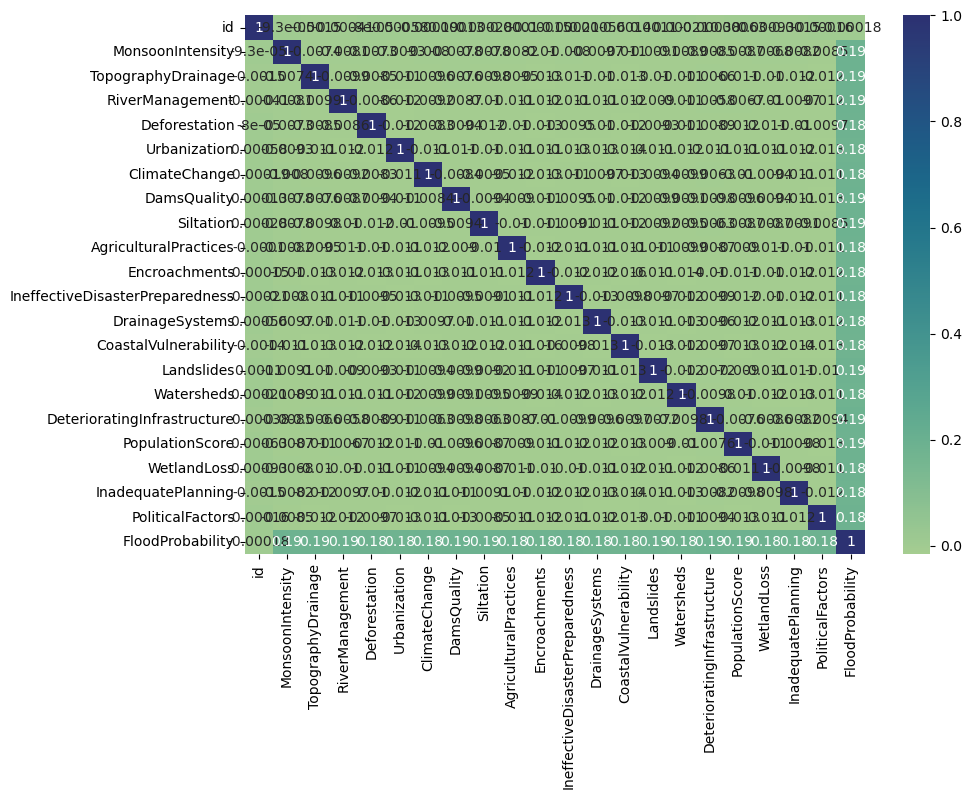

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="crest");

In [9]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,4.945239e+00,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,2.078141e+00,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [10]:
x=df.drop(["id","FloodProbability"],axis=1)
y=df["FloodProbability"]

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [12]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Ridge,8.448773e-01,0.020080,0.015792
Linear,8.448773e-01,0.020080,0.015792
SGD,8.343182e-01,0.020752,0.016930
XGBRegressor,8.090670e-01,0.022278,0.017588
mlp_regressor,7.988782e-01,0.022864,0.016680
AdaBoost,6.700101e-01,0.029287,0.023668
SVR,6.473794e-01,0.030275,0.024834
Gradient Boosting,6.142898e-01,0.031663,0.026065
KNeighborsRegressor,5.305870e-01,0.034930,0.028213
Decision Tree,5.713868e-02,0.049505,0.039417


In [13]:
R=Ridge()

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [15]:
model=R.fit(x_train,y_train)

In [16]:
tahmin=R.predict(x_test)

In [17]:
r2_score(y_test,tahmin)

0.8448773363925378

In [18]:
mean_squared_error(y_test,tahmin)**.5

0.020080004651606132

In [19]:
residuals=y_test-tahmin

<Axes: xlabel='FloodProbability', ylabel='Count'>

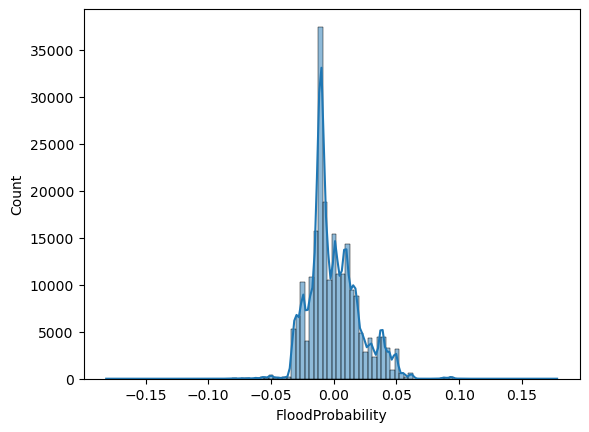

In [20]:
sns.histplot(residuals,kde=True,bins=100)

<Axes: xlabel='FloodProbability', ylabel='Density'>

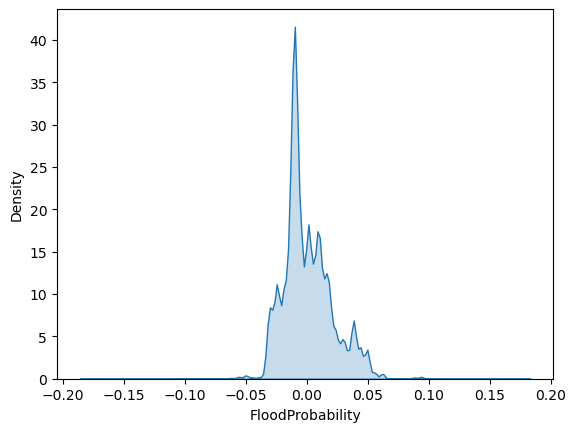

In [21]:
sns.kdeplot(residuals, fill=True)

Kaggle daki test verisini tahmin edelim

In [29]:
test=pd.read_csv("test.csv")

In [30]:
guess=pd.DataFrame()

In [31]:
guess["id"]=test["id"]

In [33]:
test=test.drop("id",axis=1)

In [34]:
guess["FloodProbability"]=R.predict(test)

In [35]:
guess.head()

,id,FloodProbability
0,1117957,0.573613
1,1117958,0.455271
2,1117959,0.454752
3,1117960,0.466179
4,1117961,0.466085


In [36]:
guess.to_csv("tahmin1.csv",index=False)

### Deep Learning

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import normalize, scale

In [37]:
x=df.drop(["id","FloodProbability"],axis=1)
y=df["FloodProbability"]

In [38]:
x=scale(x)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20 ,random_state=42)

In [40]:
model=Sequential()
model.add(Dense(120,activation="relu")) 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1)) 
model.compile(loss="mse", optimizer="adam")                                                                           

In [41]:
history=model.fit(x_train,y_train ,validation_data=(x_test,y_test), batch_size=128, epochs=500)

Epoch 1/500
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 7s 764us/step - loss: 0.0355 - val_loss: 4.0200e-04
Epoch 2/500
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 5s 730us/step - loss: 3.8732e-04 - val_loss: 3.7061e-04
Epoch 3/500
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 5s 734us/step - loss: 3.6943e-04 - val_loss: 3.6221e-04
Epoch 4/500
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 5s 735us/step - loss: 3.6514e-04 - val_loss: 3.6814e-04
Epoch 5/500
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 5s 732us/step - loss: 3.6416e-04 - val_loss: 3.6039e-04
Epoch 6/500
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 5s 732us/step - loss: 3.6303e-04 - val_loss: 3.6309e-04
Epoch 7/500
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 5s 731us/step - loss: 3.6192e-04 - val_loss: 3.5768e-04
Epoch 8/500
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 5s 735us/step - loss: 3.6169e-04 - val_loss: 3.5833e-04
Epoch 9/500
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 5s 736us/step - loss: 3.6030e-04 - val_loss: 3.6016e-04
Epoch 10/500
6988/6988 ━━━━━━━━━━━━━━━━━━━━ 5s 732us/step - loss: 3.6025e-04 - val_loss: 3.5934e-04
Epoch 11/500


In [42]:
thmn=model.predict(x_test)

6988/6988 ━━━━━━━━━━━━━━━━━━━━ 3s 464us/step


In [47]:
r2_score(thmn,y_test)

0.8393590972039734

In [48]:
mean_squared_error(thmn,y_test)**.5

0.019080281264602837

In [45]:
loss_f=pd.DataFrame(history.history)

<Axes: >

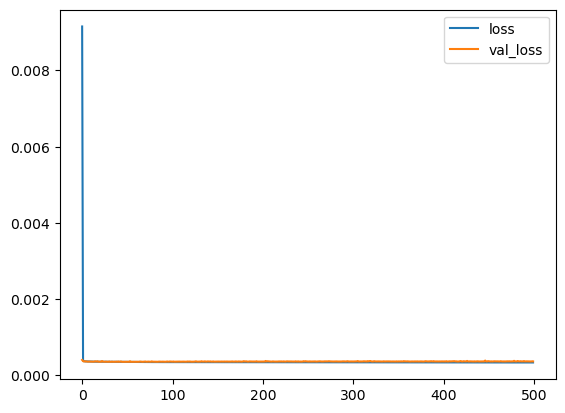

In [46]:
loss_f.plot()

In [49]:
guess["FloodProbability"]=model.predict(test)

23291/23291 ━━━━━━━━━━━━━━━━━━━━ 11s 470us/step


In [50]:
guess

,id,FloodProbability
0,1117957,0.671786
1,1117958,0.671786
2,1117959,0.671786
3,1117960,0.671786
4,1117961,0.671786
...,...,...
745300,1863257,0.671786
745301,1863258,0.671786
745302,1863259,0.671786
745303,1863260,0.671786


In [51]:
guess.to_csv("tahmin2.csv",index=False)

Sonuc olarak modelimizi hem ML (84% r2_score) hem de DL (83% r2_score) kullanarak eğittik ve kaggle daki test verilerini tahmin ettirdik.